In [1]:
import json, pickle, copy
import numpy as np
from evaluations import *

# Read Data

In [2]:
good_questions = np.load('Data/EEDI/good_questions.npy') # question_id's to use
with open('Data/EEDI/good_questions_statement.json', 'r') as f:
    good_questions_statement = json.load(f) # key: question_id, value: problem statement
with open('Data/EEDI/good_questions_answer.json', 'r') as f:
    good_questions_answer = json.load(f) # key: question_id, value: problem answer
with open('Data/EEDI/surveys.pkl', 'rb') as f:
    surveys = pickle.load(f) # key: question id, value: survey samples
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_4o.pkl', 'rb') as f:
    synthetic_answers = pickle.load(f) # key: question id, value: synthetic answers, binary, 1 for correct, 0 for incorrect

# key: question_id, value: real answers, binary, 1 for correct, 0 for incorrect
real_answers = {}
for i in range(len(good_questions)):
    question_id = good_questions[i]
    vals_i = copy.deepcopy(surveys[question_id]['IsCorrect'].values)
    real_answers[question_id] = vals_i

In [3]:
len(good_questions), len(good_questions_statement), len(good_questions_answer), len(surveys), len(synthetic_answers)

(412, 412, 412, 412, 412)

# Sample Uses

In [4]:
alpha = 0.1
gamma = 0.5
k_max = 50
ks = np.arange(1, k_max+1)
C = np.sqrt(2)
train_proportion = 0.6

threshold:  0.05
k_hat:  7
synthetic CI width:  0.6541878578549558
test miscoverage rate:  0.03636363636363636


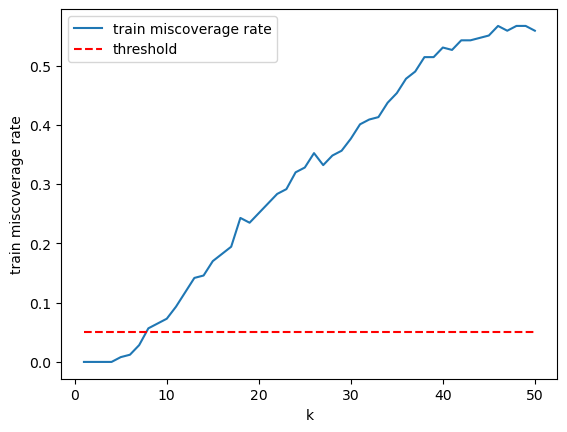

In [5]:
_, _, _ = one_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion, 
                        type = 'interval', seed = 0, report = True, k_report = 10)

threshold:  0.05
k_hat:  8
synthetic CI width:  0.6119367076702041
test miscoverage rate:  0.03636363636363636


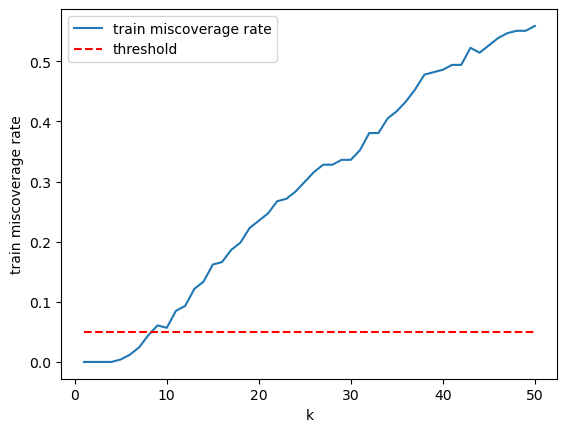

In [6]:
_, _, _ = one_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion, 
                        type = 'point', seed = 0, report = True, k_report = 10)

In [7]:
results_interval, report_interval = multiple_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion, 
                                                       type = 'interval', seed = 0, num_splits = 100, split_report = 1, report = True)
results_point, report_point = multiple_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion,
                                                 type = 'point', seed = 0, num_splits = 100, split_report = 1, report = True)

In [8]:
results_interval

,k_hat,synth_CI_width,test_miscov_rate
0,7.0,0.654188,0.006061
1,10.0,0.547333,0.096970
2,7.0,0.654188,0.012121
3,8.0,0.611937,0.060606
4,8.0,0.611937,0.060606
...,...,...,...
95,9.0,0.576939,0.084848
96,7.0,0.654188,0.036364
97,8.0,0.611937,0.054545
98,7.0,0.654188,0.012121


In [9]:
results_point

,k_hat,synth_CI_width,test_miscov_rate
0,7.0,0.654188,0.006061
1,10.0,0.547333,0.078788
2,7.0,0.654188,0.012121
3,9.0,0.576939,0.060606
4,10.0,0.547333,0.072727
...,...,...,...
95,10.0,0.547333,0.066667
96,10.0,0.547333,0.066667
97,9.0,0.576939,0.060606
98,7.0,0.654188,0.012121


In [10]:
report_interval

,mean,std
k_hat,7.820000,0.852995
synth_CI_width,0.621515,0.031819
test_miscov_rate,0.049515,0.023411


In [11]:
report_point

,mean,std
k_hat,8.530000,1.043600
synth_CI_width,0.595950,0.036379
test_miscov_rate,0.048788,0.019439
